In [ ]:
Government Dataset - "Crime Review for the month of February 2024"

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('CRIME_REVIEW_FOR_THE_MONTH_OF_FEBRUARY_2024_0.csv')

# Display the first few rows
print(df.head())

   Sl. No. Heads of Crime               Major Head   \
0        1  A - IPC Crime  Murder (Sec.302/303 IPC)   
1        2  A - IPC Crime  Murder (Sec.302/303 IPC)   
2        3  A - IPC Crime  Murder (Sec.302/303 IPC)   
3        4  A - IPC Crime  Murder (Sec.302/303 IPC)   
4        5  A - IPC Crime  Murder (Sec.302/303 IPC)   

                            Minor Head  \
0                             For gain   
1                Over Property Dispute   
2  Due to Personal Vendetta or enemity   
3               Due to Sexual jealousy   
4                 For dowry by burning   

   During the current year upto the end of month under review  \
0                                                  5            
1                                                  7            
2                                                  1            
3                                                  1            
4                                                  0            

   During the correspondi

# Crime Review Data Analysis

This script loads and previews a crime review dataset for February 2024.



In [5]:
# Check for missing values in each column
print(df.isnull().sum())

# Handle missing values in 'Minor Head' column
df['Minor Head'] = df['Minor Head'].fillna('Unknown')  # Fill missing values with 'Unknown'

Sl. No.                                                        0
Heads of Crime                                                 0
Major Head                                                     0
Minor Head                                                    71
During the current year upto the end of month under review     0
During the corresponding month of previous year                0
During the previous month                                      0
During the current month                                       0
dtype: int64


## Missing Values Handling

- Checked for missing values in each column using `df.isnull().sum()`.  
- Filled missing values in the `'Minor Head'` column with `'Unknown'` using `fillna()`.  

In [6]:
# Check data types
print(df.info())

# Convert columns to appropriate data types if needed
# For example, ensure all crime count columns are integers
df['During the current year upto the end of month under review'] = df['During the current year upto the end of month under review'].astype(int)
df['During the corresponding month of previous year'] = df['During the corresponding month of previous year'].astype(int)
df['During the previous month'] = df['During the previous month'].astype(int)
df['During the current month'] = df['During the current month'].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692 entries, 0 to 691
Data columns (total 8 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   Sl. No.                                                     692 non-null    int64 
 1   Heads of Crime                                              692 non-null    object
 2   Major Head                                                  692 non-null    object
 3   Minor Head                                                  692 non-null    object
 4   During the current year upto the end of month under review  692 non-null    int64 
 5   During the corresponding month of previous year             692 non-null    int64 
 6   During the previous month                                   692 non-null    int64 
 7   During the current month                                    692 non-null    int64 
dtypes: int64(5)

# Data Type Checking and Conversion

- Used `df.info()` to check data types of all columns.  
- Ensured crime count columns are integers using `astype(int)`.  


In [7]:
# Drop 'Sl. No.' column if not needed
df = df.drop(columns=['Sl. No.'])

# Column Removal  

- Dropped the `'Sl. No.'` column if it is not needed using `drop(columns=['Sl. No.'])`.  


In [8]:
# Check for duplicate rows
print(df.duplicated().sum())

# Drop duplicates if any
df = df.drop_duplicates()

0


# Duplicate Data Handling  

- Checked for duplicate rows using `df.duplicated().sum()`.  
- Removed duplicate rows using `drop_duplicates()`.  


In [9]:
# Get summary statistics for numerical columns
print(df.describe())

       During the current year upto the end of month under review  \
count                                         692.000000            
mean                                           55.488439            
std                                           261.488976            
min                                             0.000000            
25%                                             0.000000            
50%                                             0.000000            
75%                                             9.000000            
max                                          3908.000000            

       During the corresponding month of previous year  \
count                                       692.000000   
mean                                         24.125723   
std                                         110.205006   
min                                           0.000000   
25%                                           0.000000   
50%                           

# Summary Statistics  

- Generated summary statistics for numerical columns using `df.describe()`.  


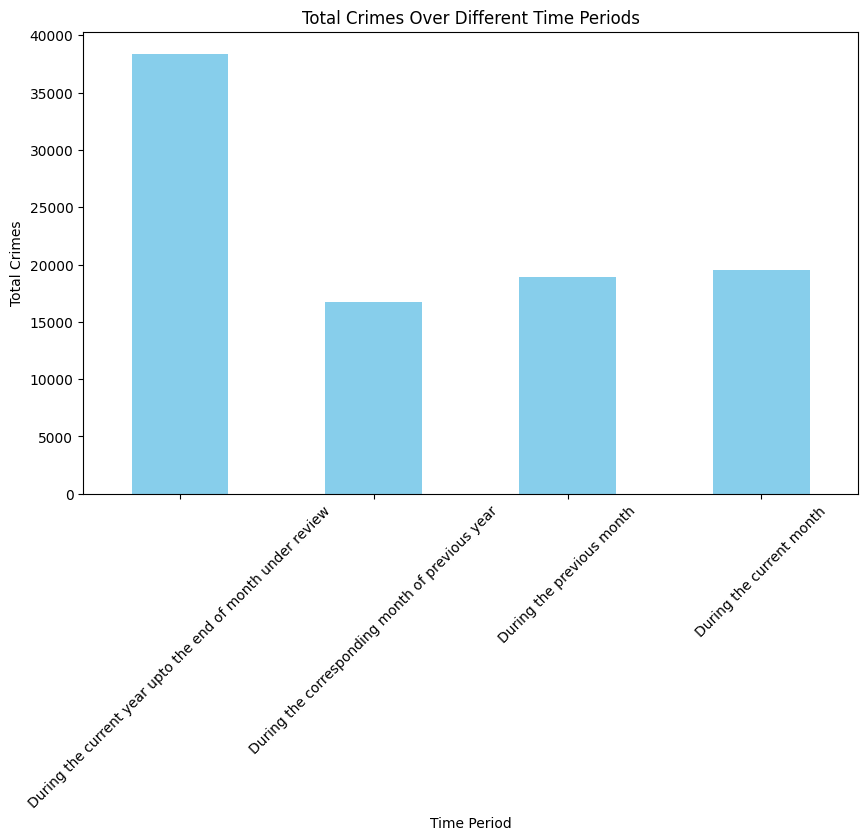

In [10]:
import matplotlib.pyplot as plt

# Sum crimes for each time period
time_periods = ['During the current year upto the end of month under review',
                'During the corresponding month of previous year',
                'During the previous month',
                'During the current month']
total_crimes = df[time_periods].sum()

# Plot
plt.figure(figsize=(10, 6))
total_crimes.plot(kind='bar', color='skyblue')
plt.title('Total Crimes Over Different Time Periods')
plt.xlabel('Time Period')
plt.ylabel('Total Crimes')
plt.xticks(rotation=45)
plt.show()

# Crime Data Visualization

- Summed up crimes for each time period using `df[time_periods].sum()`.  
- Plotted a bar chart to visualize total crimes over different time periods using `matplotlib`.  


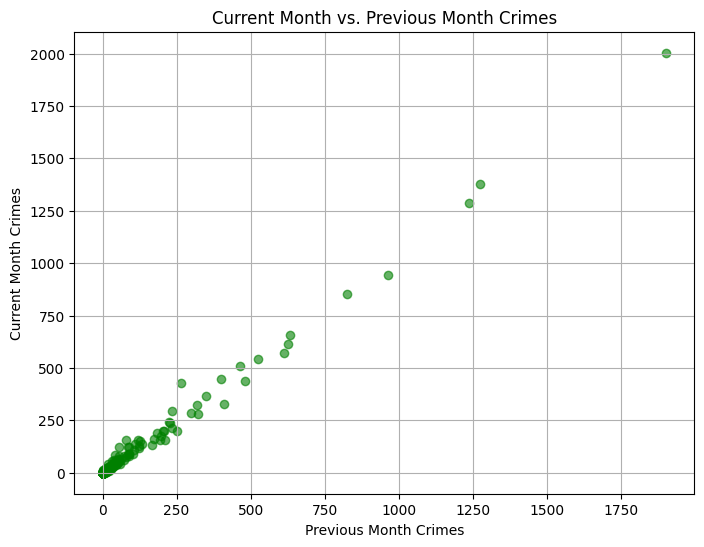

In [12]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['During the previous month'], df['During the current month'], alpha=0.6, color='green')
plt.title('Current Month vs. Previous Month Crimes')
plt.xlabel('Previous Month Crimes')
plt.ylabel('Current Month Crimes')
plt.grid(True)
plt.show()

# Scatter Plot: Current Month vs. Previous Month Crimes  

- Plotted a scatter plot to compare crime counts between the **previous month** and the **current month**.  
- Each point represents a data entry, showing how crime numbers vary between these two months.  
- Helps identify trends, correlations, or outliers in crime patterns.  


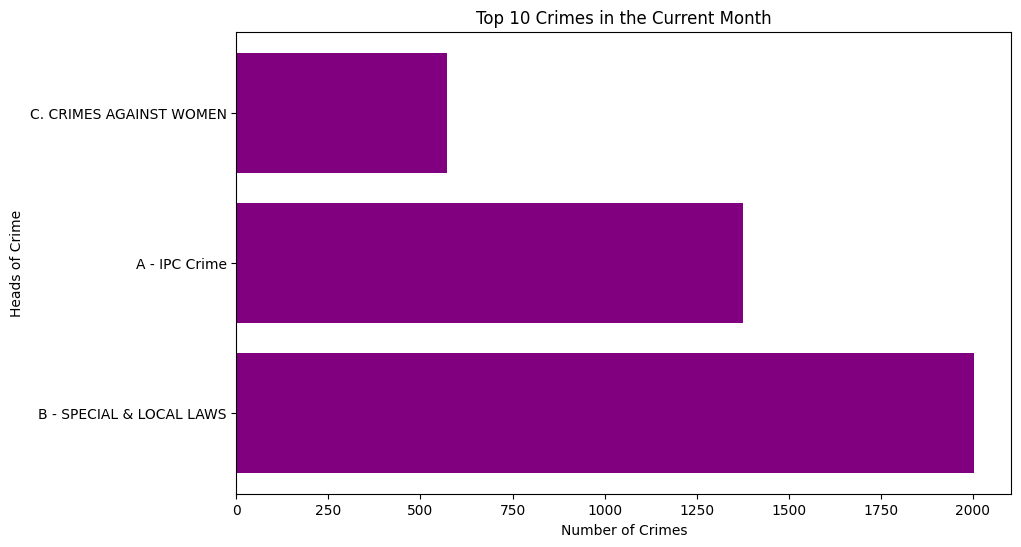

In [16]:
# Sort by current month crimes and select top 10
top_crimes = df.nlargest(10, 'During the current month')

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_crimes['Heads of Crime'], top_crimes['During the current month'], color='purple')
plt.title('Top 10 Crimes in the Current Month')
plt.xlabel('Number of Crimes')
plt.ylabel('Heads of Crime')
plt.show()

# Top 10 Crimes in the Current Month  

- Sorted the dataset to find the **top 10 crimes** with the highest occurrences in the current month.  
- Plotted a **horizontal bar chart** to visualize the most frequent crime types.  
- Helps in identifying the most prevalent crimes for focused intervention.  


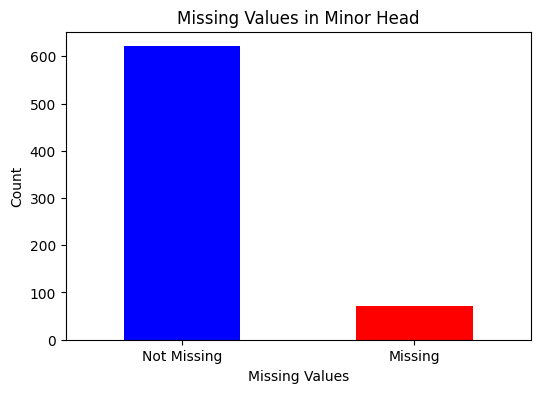

In [18]:
# Check missing values
missing_values = df['Minor Head'].isnull().value_counts()

# Plot
plt.figure(figsize=(6, 4))
missing_values.plot(kind='bar', color=['blue', 'red'])
plt.title('Missing Values in Minor Head')
plt.xlabel('Missing Values')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Missing', 'Missing'], rotation=0)
plt.show()

# Missing Values in 'Minor Head'  

- Checked for missing values in the **'Minor Head'** column.  
- Plotted a **bar chart** to show the count of missing vs. non-missing values.  
- Helps assess data completeness and determine the need for handling missing values.  


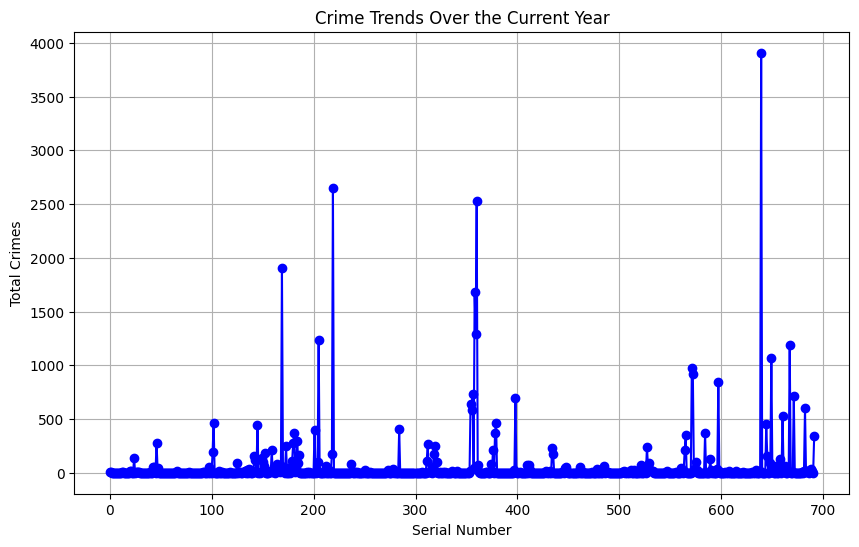

In [19]:
# Plot trends over the current year
plt.figure(figsize=(10, 6))
plt.plot(df['During the current year upto the end of month under review'], marker='o', color='blue')
plt.title('Crime Trends Over the Current Year')
plt.xlabel('Serial Number')
plt.ylabel('Total Crimes')
plt.grid(True)
plt.show()

# Crime Trends Over the Current Year  

- Plotted a **line graph** to visualize crime trends over the current year.  
- Each point represents crime data for a specific entry, helping identify fluctuations.  
- Useful for spotting seasonal trends, increases, or decreases in crime rates.  


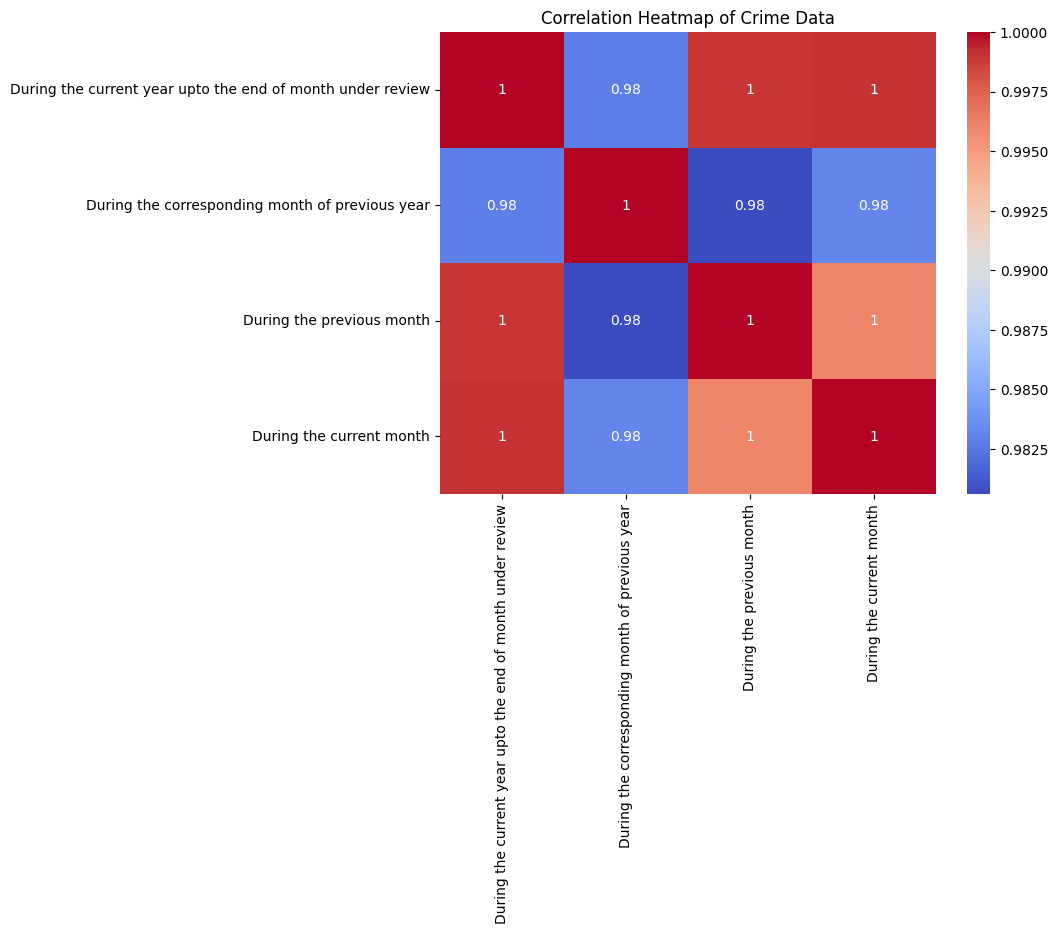

In [20]:
import seaborn as sns

# Correlation matrix
correlation_matrix = df[time_periods].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Crime Data')
plt.show()

# Correlation Heatmap of Crime Data  

- Computed the **correlation matrix** to analyze relationships between different time-period crime counts.  
- Used a **heatmap** to visually represent the strength and direction of correlations.  
- Helps identify trends, such as whether crime numbers in one period impact another.  


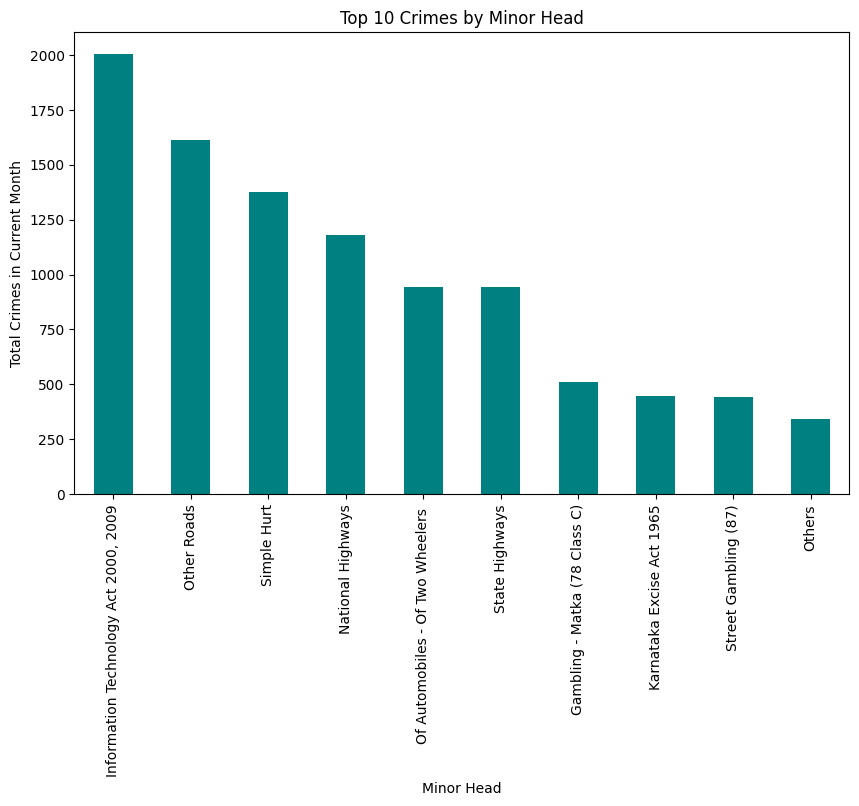

In [23]:
# Group by Minor Head and sum crimes
minor_head_crimes = df.groupby('Minor Head')['During the current month'].sum().nlargest(10)

# Plot
plt.figure(figsize=(10, 6))
minor_head_crimes.plot(kind='bar', color='teal')
plt.title('Top 10 Crimes by Minor Head')
plt.xlabel('Minor Head')
plt.ylabel('Total Crimes in Current Month')
plt.show()

# Top 10 Crimes by Minor Head  

- Grouped data by **'Minor Head'** and summed crimes for the current month.  
- Plotted a **bar chart** to highlight the **top 10 crime categories** with the highest occurrences.  
- Helps in understanding which crime types are most prevalent.  


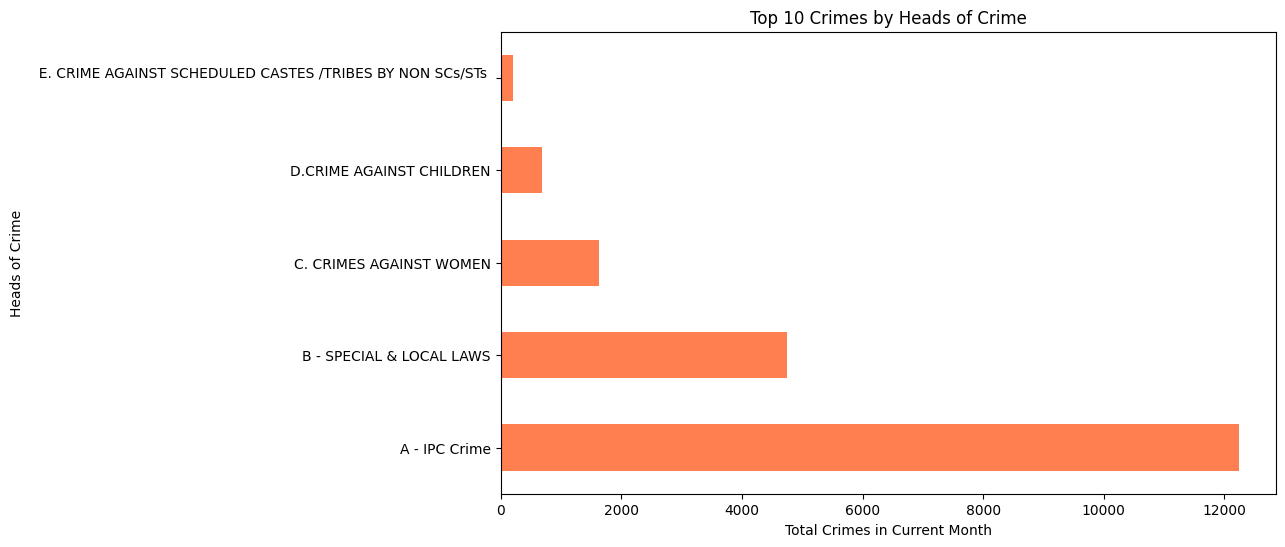

In [26]:
# Group by Heads of Crime and sum crimes
heads_of_crime = df.groupby('Heads of Crime')['During the current month'].sum().nlargest(10)

# Plot
plt.figure(figsize=(10, 6))
heads_of_crime.plot(kind='barh', color='coral')
plt.title('Top 10 Crimes by Heads of Crime')
plt.xlabel('Total Crimes in Current Month')
plt.ylabel('Heads of Crime')
plt.show()

# Top 10 Crimes by Heads of Crime  

- Grouped data by **'Heads of Crime'** and summed crimes for the current month.  
- Plotted a **horizontal bar chart** to visualize the **top 10 crime categories** with the highest occurrences.  
- Helps in identifying major crime trends and areas requiring attention.  


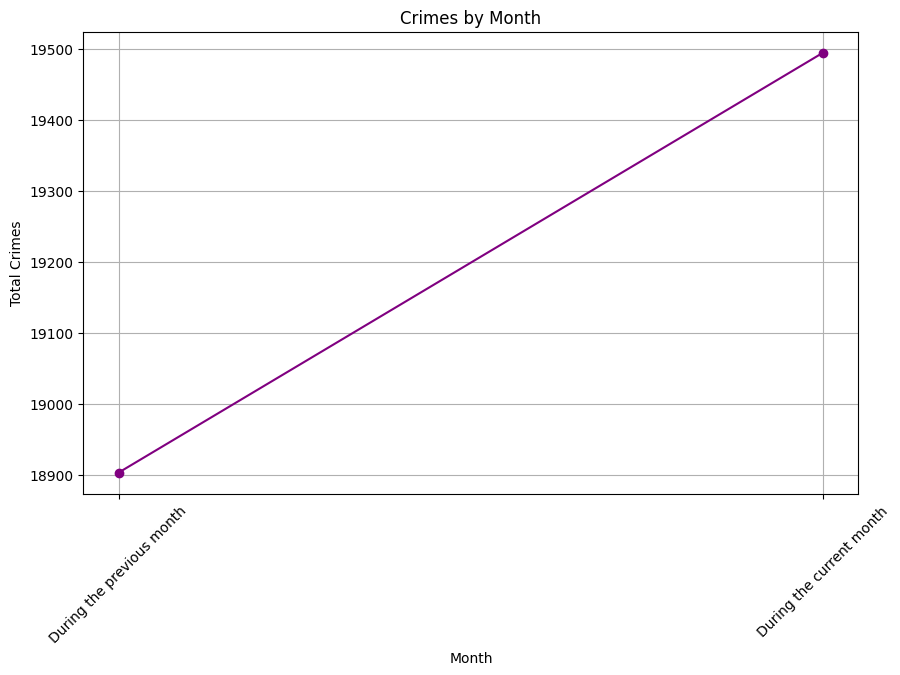

In [28]:
# Sum crimes for each month
monthly_crimes = df[['During the previous month', 'During the current month']].sum()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_crimes.index, monthly_crimes.values, marker='o', color='purple')
plt.title('Crimes by Month')
plt.xlabel('Month')
plt.ylabel('Total Crimes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Crimes by Month  

- Summed total crimes for the **previous** and **current month**.  
- Plotted a **line graph** to compare crime trends between the two months.  
- Helps visualize fluctuations in crime rates over time.  


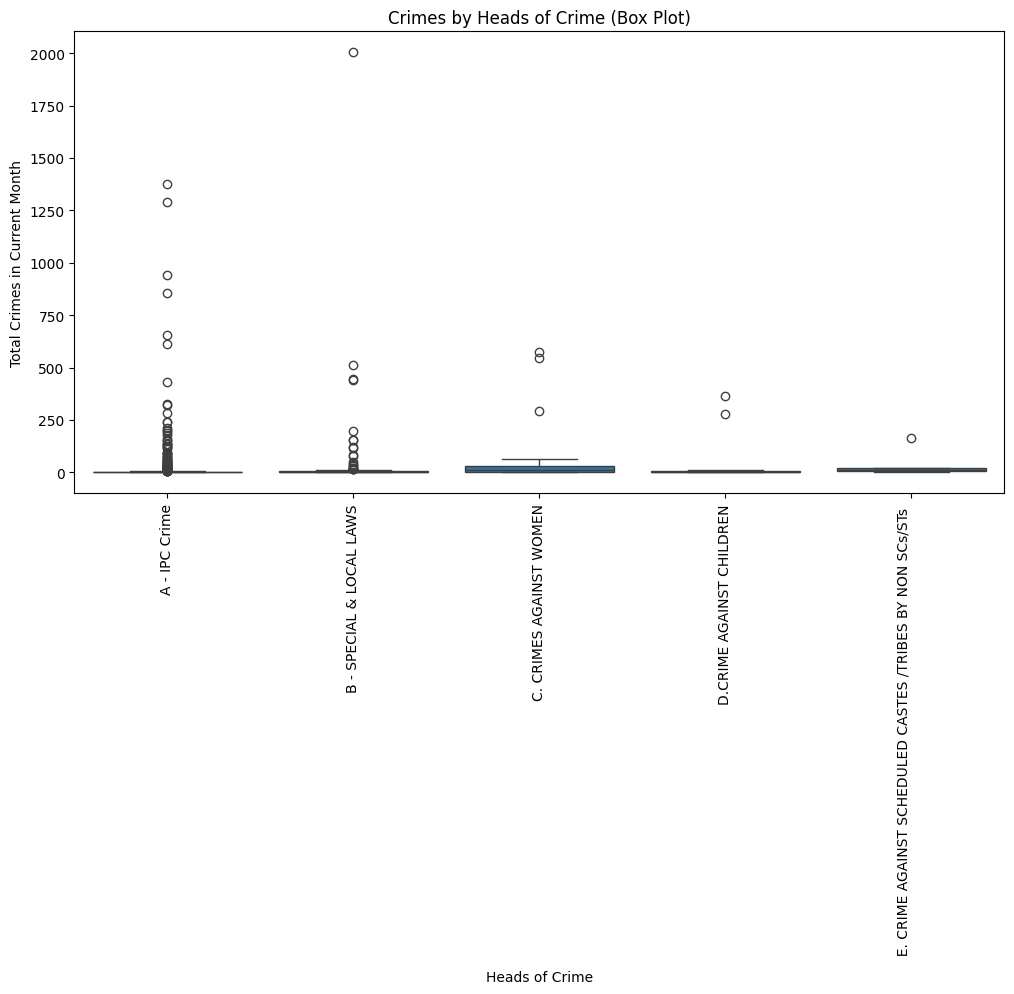

In [29]:
# Box plot for crimes by Heads of Crime
plt.figure(figsize=(12, 6))
sns.boxplot(x='Heads of Crime', y='During the current month', data=df)
plt.title('Crimes by Heads of Crime (Box Plot)')
plt.xlabel('Heads of Crime')
plt.ylabel('Total Crimes in Current Month')
plt.xticks(rotation=90)
plt.show()

# Crimes by Heads of Crime (Box Plot)  

- Created a **box plot** to show the distribution of crimes for each **'Heads of Crime'** category.  
- Helps identify **medians, variations, and outliers** in crime data.  
- Useful for understanding the spread and consistency of crime occurrences.  


C:\Users\jkpm4\AppData\Local\Temp\ipykernel_13996\3744372744.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Heads of Crime', y='During the current month', data=df, jitter=True, palette='viridis')


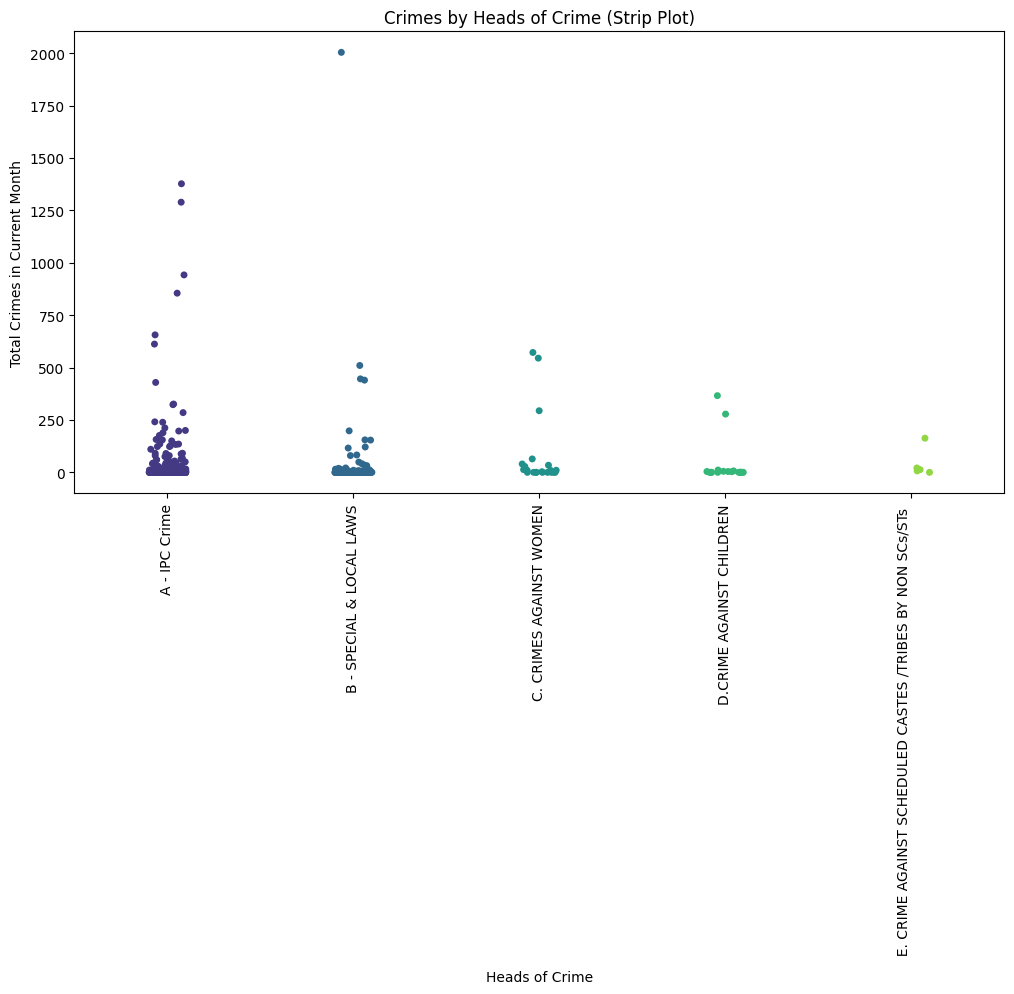

In [32]:
# Strip plot for crimes by Heads of Crime
plt.figure(figsize=(12, 6))
sns.stripplot(x='Heads of Crime', y='During the current month', data=df, jitter=True, palette='viridis')
plt.title('Crimes by Heads of Crime (Strip Plot)')
plt.xlabel('Heads of Crime')
plt.ylabel('Total Crimes in Current Month')
plt.xticks(rotation=90)
plt.show()

# Crimes by Heads of Crime (Strip Plot)  

- Plotted a **strip plot** to visualize individual crime data points for each **'Heads of Crime'** category.  
- **Jittering** was used to avoid overlapping points, making patterns clearer.  
- Helps in identifying **data distribution, density, and outliers**.  


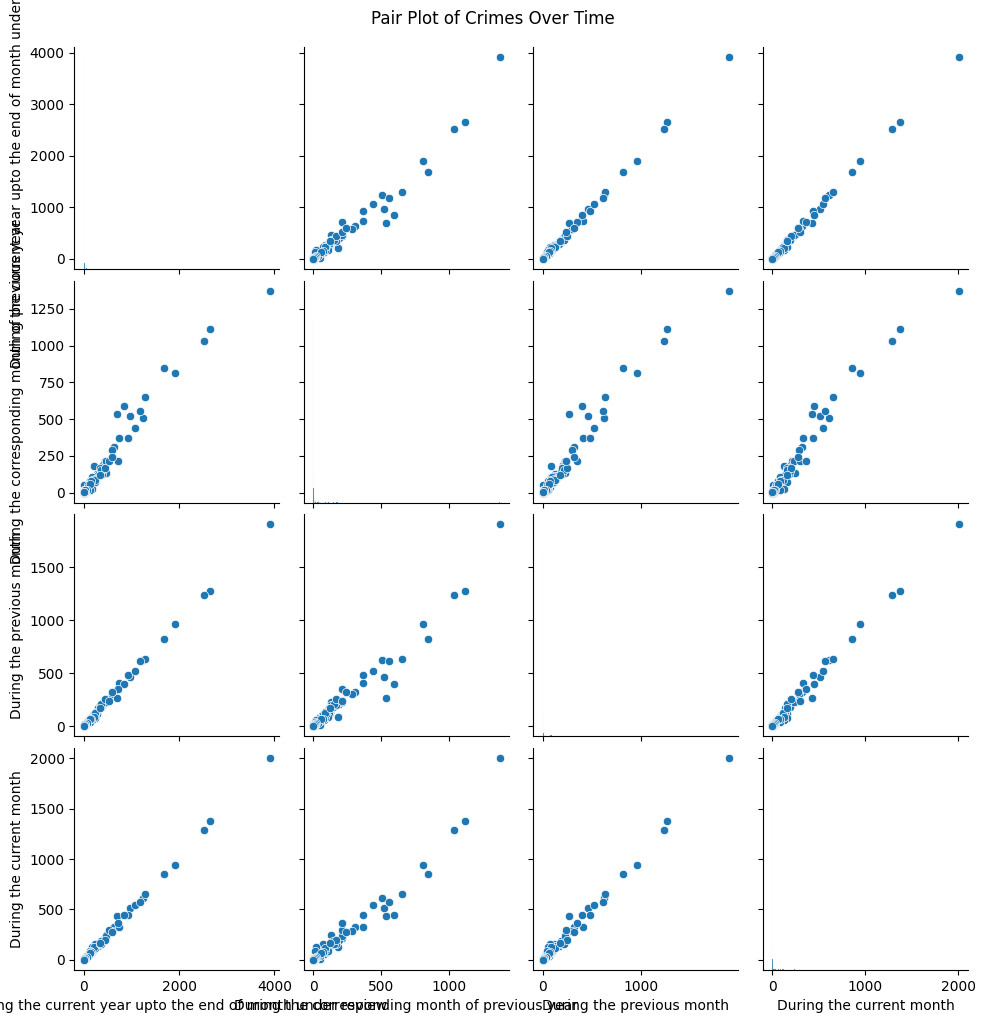

In [34]:
# Pair plot for numerical columns
sns.pairplot(df[['During the current year upto the end of month under review',
                 'During the corresponding month of previous year',
                 'During the previous month',
                 'During the current month']])
plt.suptitle('Pair Plot of Crimes Over Time', y=1.02)
plt.show()

# Pair Plot of Crimes Over Time  

- Created a **pair plot** to visualize relationships between crime counts across different time periods.  
- Helps identify **correlations, patterns, and trends** between different months.  
- Useful for spotting **linear relationships or clusters** in the data.  


C:\Users\jkpm4\AppData\Local\Temp\ipykernel_13996\1711303861.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Heads of Crime', data=df, palette='magma')


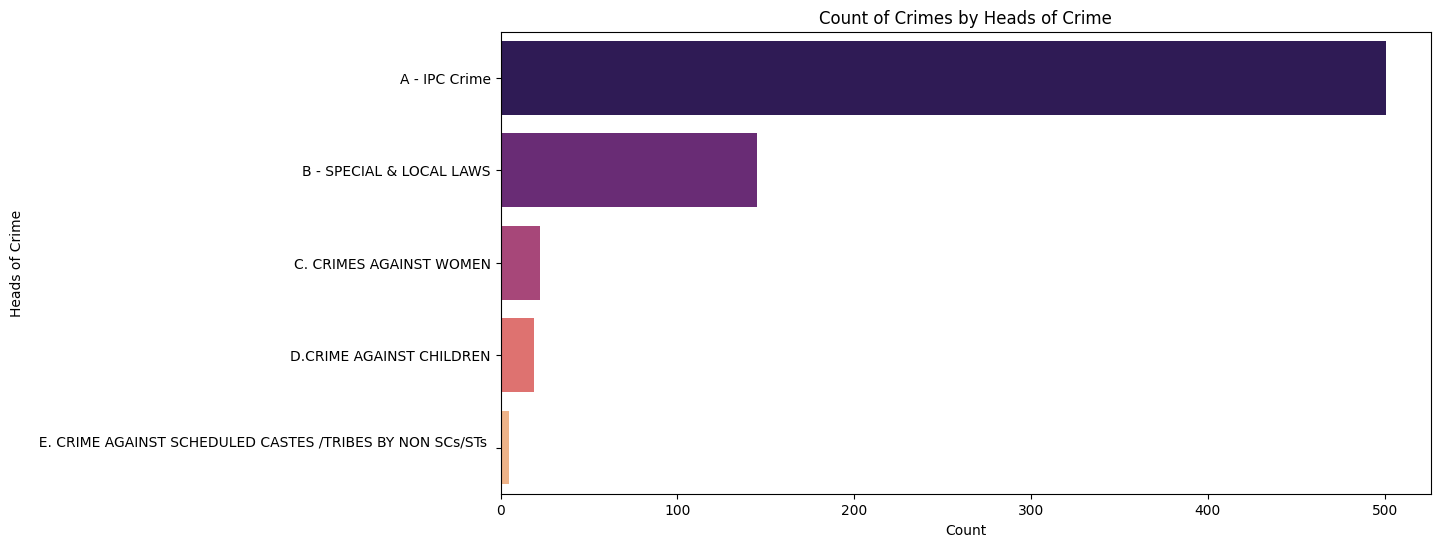

In [36]:
# Count plot for Heads of Crime
plt.figure(figsize=(12, 6))
sns.countplot(y='Heads of Crime', data=df, palette='magma')
plt.title('Count of Crimes by Heads of Crime')
plt.xlabel('Count')
plt.ylabel('Heads of Crime')
plt.show()

# Count of Crimes by Heads of Crime  

- Plotted a **count plot** to show the frequency of each **'Heads of Crime'** category.  
- Helps identify the most and least common crime types.  
- Useful for understanding crime distribution across different categories.  


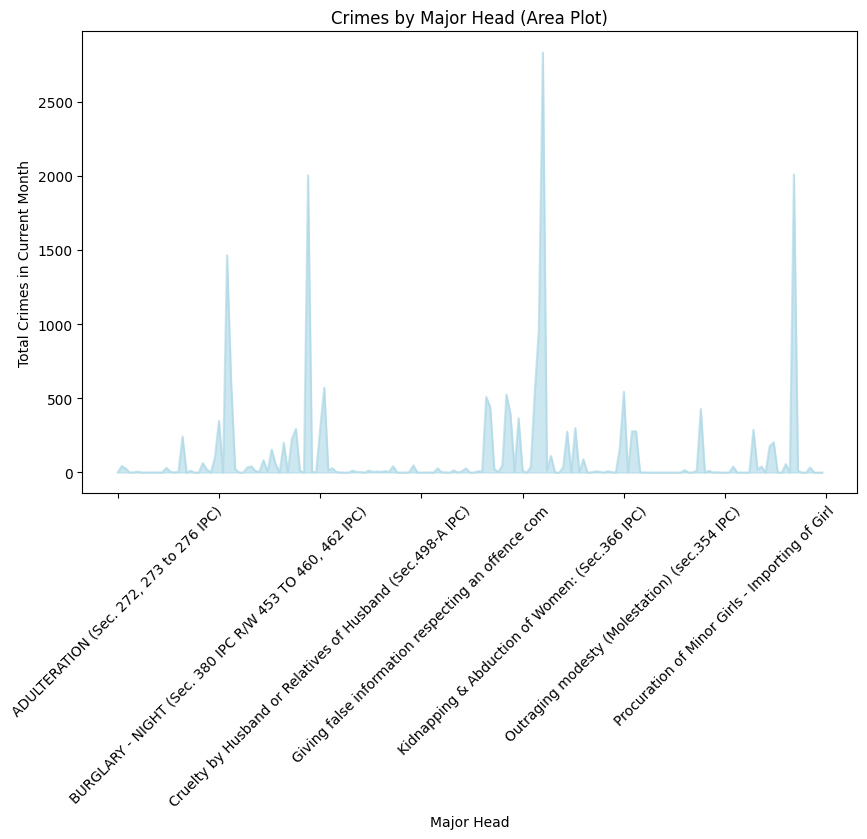

In [37]:
# Area plot for crimes by Major Head
major_head_crimes = df.groupby('Major Head')['During the current month'].sum()

# Plot
plt.figure(figsize=(10, 6))
major_head_crimes.plot(kind='area', color='lightblue', alpha=0.6)
plt.title('Crimes by Major Head (Area Plot)')
plt.xlabel('Major Head')
plt.ylabel('Total Crimes in Current Month')
plt.xticks(rotation=45)
plt.show()

# Crimes by Major Head (Area Plot)  

- Grouped data by **'Major Head'** and summed crimes for the current month.  
- Used an **area plot** to visualize the total crime distribution across major crime categories.  
- Helps in understanding the overall contribution of each major crime type.  


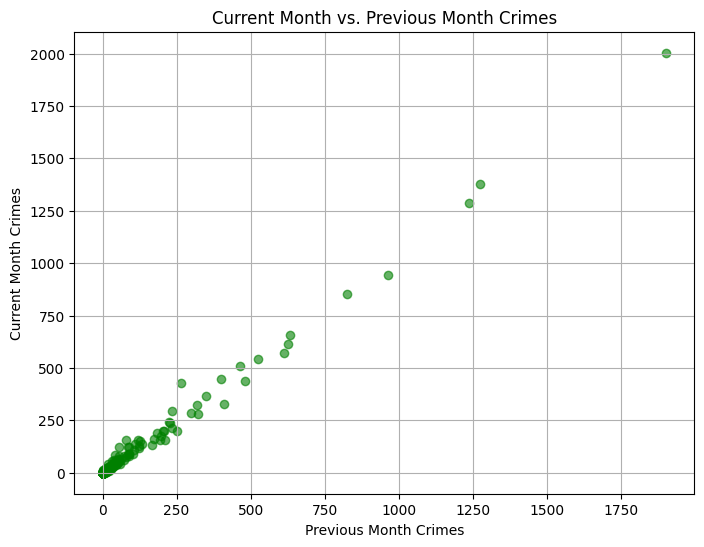

In [40]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['During the previous month'], df['During the current month'], alpha=0.6, color='green')
plt.title('Current Month vs. Previous Month Crimes')
plt.xlabel('Previous Month Crimes')
plt.ylabel('Current Month Crimes')
plt.grid(True)
plt.show()

# Current Month vs. Previous Month Crimes (Scatter Plot)  

- Plotted a **scatter plot** to compare crime counts between the **previous month** and the **current month**.  
- Helps identify **trends, correlations, and outliers** in crime patterns.  
- Useful for detecting **fluctuations** in crime rates over time.  


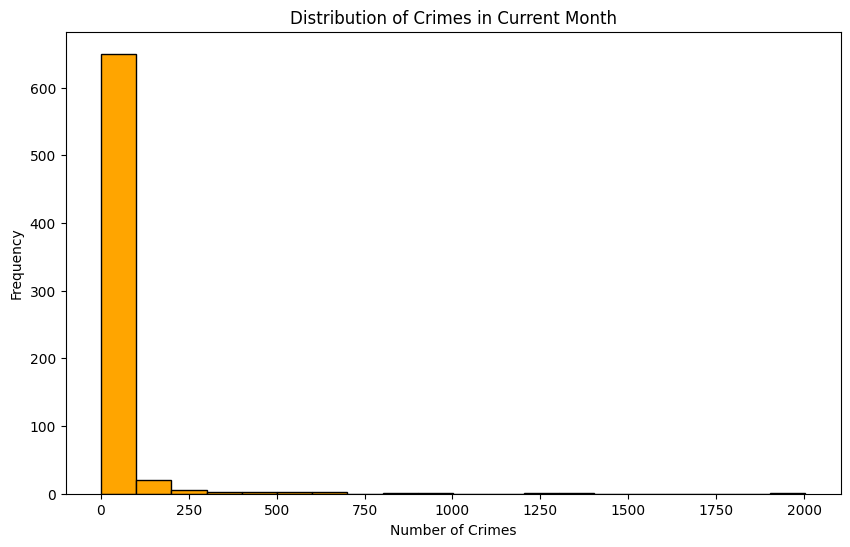

In [41]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['During the current month'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Crimes in Current Month')
plt.xlabel('Number of Crimes')
plt.ylabel('Frequency')
plt.show()

# Distribution of Crimes in Current Month (Histogram)  

- Plotted a **histogram** to show the distribution of crime counts for the **current month**.  
- Helps identify **frequency patterns, skewness, and outliers** in crime data.  
- Useful for understanding how crime counts are spread across different ranges.  


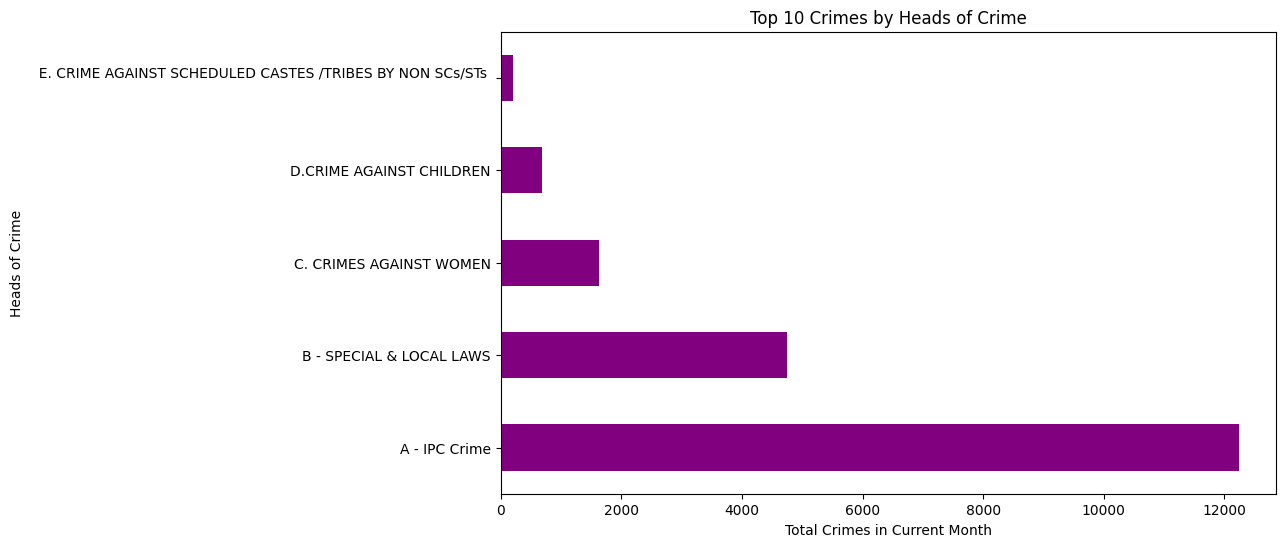

In [42]:
# Group by Heads of Crime and sum crimes
heads_of_crime = df.groupby('Heads of Crime')['During the current month'].sum().nlargest(10)

# Plot
plt.figure(figsize=(10, 6))
heads_of_crime.plot(kind='barh', color='purple')
plt.title('Top 10 Crimes by Heads of Crime')
plt.xlabel('Total Crimes in Current Month')
plt.ylabel('Heads of Crime')
plt.show()

# Top 10 Crimes by Heads of Crime (Horizontal Bar Chart)  

- Grouped data by **'Heads of Crime'** and summed up crimes for the **current month**.  
- Plotted a **horizontal bar chart** to display the **top 10 most common crimes**.  
- Helps in identifying the most frequent crime categories for better analysis and decision-making.  


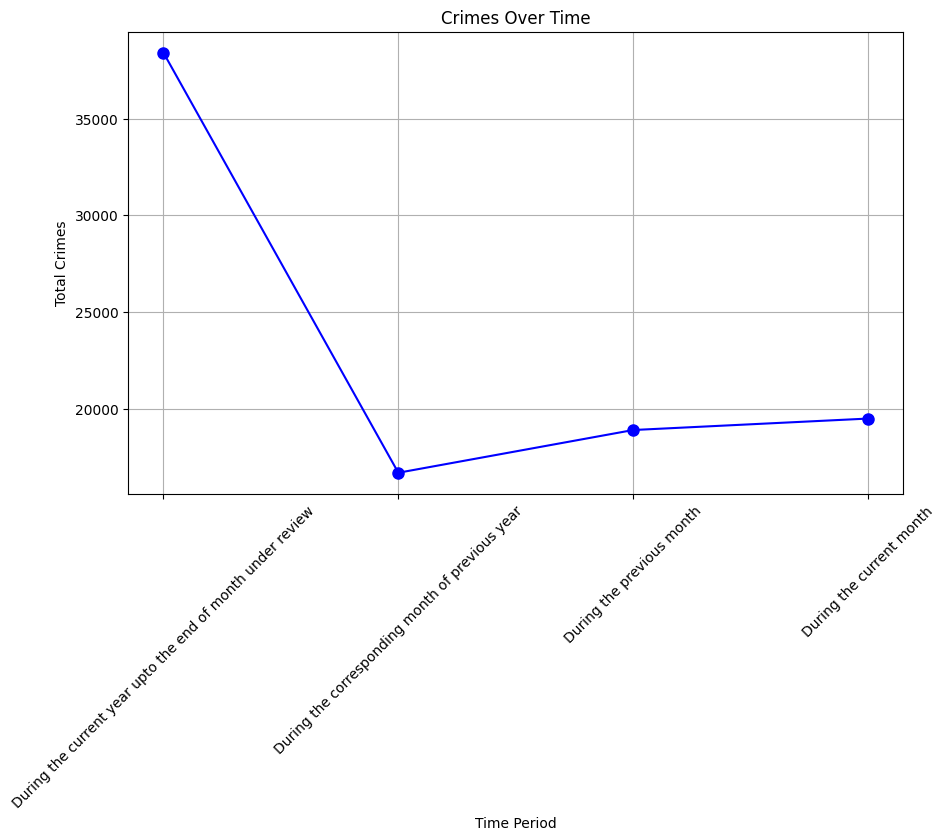

In [44]:
# Sum crimes for each time period
time_periods = ['During the current year upto the end of month under review',
                'During the corresponding month of previous year',
                'During the previous month',
                'During the current month']
total_crimes = df[time_periods].sum()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(time_periods, total_crimes, marker='o', color='blue', linestyle='-', markersize=8)
plt.title('Crimes Over Time')
plt.xlabel('Time Period')
plt.ylabel('Total Crimes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Crimes Over Time (Line Plot)  

- Summed up crimes for each **time period** to observe crime trends.  
- Plotted a **line chart** with markers to visualize **crime variations over different periods**.  
- Helps in identifying **patterns and trends** in crime rates over time.  


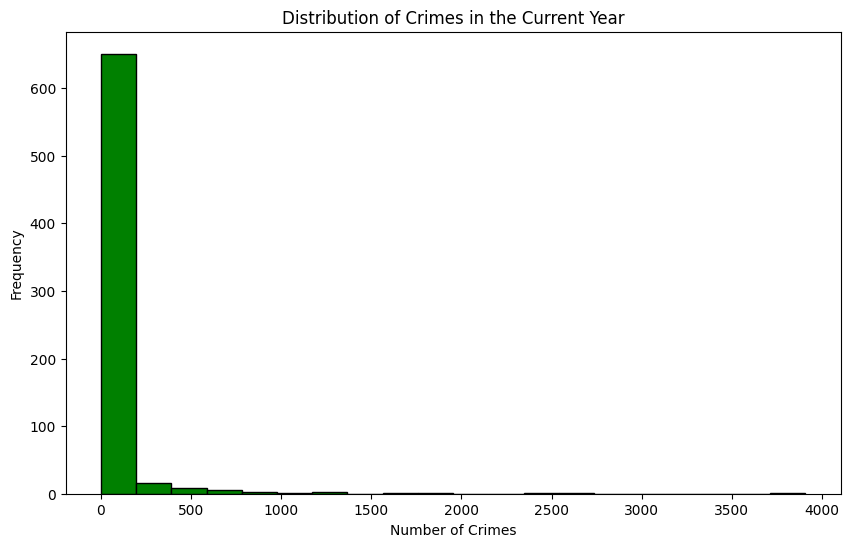

In [45]:
# Histogram for crimes in the current year
plt.figure(figsize=(10, 6))
plt.hist(df['During the current year upto the end of month under review'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of Crimes in the Current Year')
plt.xlabel('Number of Crimes')
plt.ylabel('Frequency')
plt.show()

# Distribution of Crimes in the Current Year (Histogram)  

- Displayed the **distribution of crimes** reported throughout the current year.  
- Used a **histogram** to visualize how crime counts are spread.  
- Helps in identifying **common crime ranges** and **outliers**.  


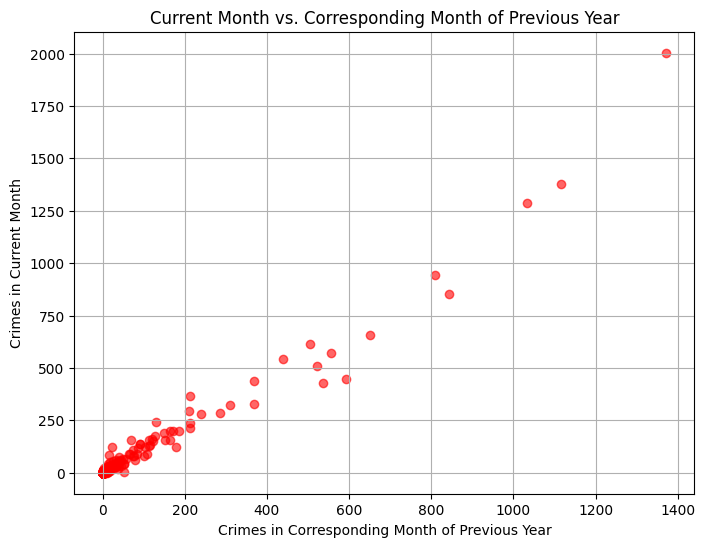

In [46]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['During the corresponding month of previous year'], df['During the current month'], alpha=0.6, color='red')
plt.title('Current Month vs. Corresponding Month of Previous Year')
plt.xlabel('Crimes in Corresponding Month of Previous Year')
plt.ylabel('Crimes in Current Month')
plt.grid(True)
plt.show()

# Current Month vs. Corresponding Month of Previous Year (Scatter Plot)  

- **Comparison of crime counts** between the **current month** and the **same month in the previous year**.  
- Each **point represents a data entry**, showing how crimes have increased or decreased.  
- Helps in identifying **trends** and **correlations** over time.  
